# Fourier Analysis and FFT
###  The purpose of this tutorial is to introduce the Fourier Analysis method. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
##THIS IS NEW
from scipy.fftpack import fft, ifft  #THIS IS THE NEW FUNCTION!
from hdf5storage import loadmat 


In [2]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e


## Orthogonality and the Fourier Series

### Orthogonality

#### When we work with vectors ($\vec{x}$ and $\vec{y}$), the definition of perpendicular is that the dot product between the vectors is that the dot product is zero 

#### $ \vec{x} \cdot \vec{y} = 0 $

#### we use the concept of perpendicular to define a coordinate axis. For example, the x and y axis in a plane are perpendicular to each other. (We will come back to this important intuition)

#### When working with functions, the concept of perpendicular is called **orthogonal**.  $f(x)$ and $g(x)$ are orthogonal if and only

#### $ \int_{-\infty}^{\infty} f(x)g(x) dx = 0$

#### The limits of the integral above are the domain of the function.  


### Orthogonality of Sinusoidal Functions 

#### $ \int_{-\infty}^{\infty} cos(ux) cos(vx) dx = 0$ if $u \neq v$
#### $ \int_{-\infty}^{\infty} cos(ux) sin(ux) dx = 0$ 

#### The way to read the above statement is that a dot product of two sinusoid functions will equal zero unless the frequency of the sinusoid are identical.   

#### The best way to build our intuition is simulate.  

In [3]:
samplingrate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 2 #This is the total length (in seconds) of the interval. 
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict()
f = [4.7,5]
nsamp = np.size(t)
es[0] = sinusoid(f[0],t,theta = 90)
es[1] = sinusoid(f[1],t)
dp = np.sum(es[0]*es[1])/nsamp 
print(dp)

0.23420135641035722


### Problem 1

Write a script to evaluate the dot product between two sinusoids as the frequency of one of the sinusoids is being changed.   

(a) Assume the sampling rate is 100 Hz and the interval T is 1 sec one of the frequencies is 5 Hz and the other frequency changes from 3 to 7 in steps of 0.1. Make a plot of the difference in frequency (from -2 to 2 Hz) verus the value of the dot product.     

(b) Run the code above for T = 1,2,5 and make labeled plots 

(c) Create a markdown box to write down what you think you see here.  

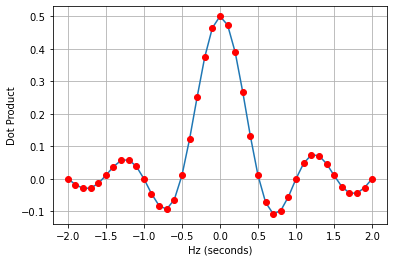

In [31]:
samprate = 100 # this is the rate at which the signal is sampled.  
ts = 1/samprate #  this is the interval in time between samples.  
T= 1 
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
es = dict() #create empty dictionary
f = np.arange(3,7.1,0.1) # creates values between 3 and 7 at intervals of 0.1
fplot = f-5;
nof = np.size(f) #41
nsamp = np.size(t) #100
dp = np.zeros(nof) #makes the values in value f into 0, giving back 41 zeros
for j in range(nof):
    es[0] = sinusoid(f[j],t)
    es[1] = sinusoid(5,t)
    dp[j] = np.sum(es[0]*es[1])/nsamp 
plt.plot(fplot,dp)
plt.plot(fplot,dp,'ro')
plt.grid()
plt.xlabel("Hz (seconds)")
plt.ylabel("Dot Product")
plt.show()

#### Fourier Series

#### Given x(t) of length N samples, 

#### $$ x(t) = A_0 + \sum_{n=0}^{N/2}{A_f[cos(2\pi{f_nt})] +B_f[sin(2\pi{f_nt})]}$$

#### $$ x(t) = \sum_{n=-N/2}^{N/2}{X_f[cos(2\pi{f_nt}) -i\cdot sin(2\pi{f_nt})]}$$

#### $$ x(t) = \sum_{n=-N/2}^{N/2}{X_f[exp^{(i 2\pi{f_nt})}]}$$

#### $$ f_n = \frac{n}{T}, n = -N/2, -N/2+1, ... N/2-1,N/2 $$

## DFT - Discrete Fourier Transform
#### The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. 

#### The first expression above represents the time series x as a sum of sin and cosine functions up to the highest allowable frequency with N samples with is N/2. 

#### I then made use of *Euler's formula*, which links the trigonometric functions to the complex exponential function: $e^{i\cdot x} = cosx+i\cdot sinx$ to generate the 3rd expression. This is the critical expression of the Fourier series.  

#### $$ X_f = A_f + i\cdot B_f $$

#### Note that the $X_f$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi f_n t}$ of function $x(t)$. The amplitude and phase of the signal can be calculated as:

#### $$Amplitude = |X_f|= \sqrt{Re(X_f)^2 + Im(X_f)^2}$$

#### $$Phase = arctan(\frac{Im(X_f)}{Re(X_f)})$$

#### where $Im(X_f)$ and $Re(X_f)$ are the imaginary and real part of the complex number,




#### The amplitude returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. 

#### However, the FFT algorithm considers both positive and negative frequencies as in the definition of the Fourier Series above.  

#### If the input signal is a real-valued sequence as we described the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and multiply by 2 to get the amplitude corresponding to the time domain signal.


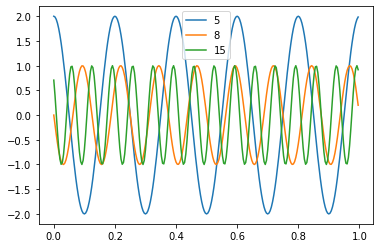

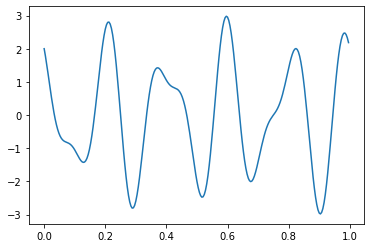

In [41]:
samplingrate = 250 # this is the rate at which the signal is sampled.  
ts = 1/samplingrate #  this is the interval in time between samples.  
T = 1 # total length of samples
t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.  
#manipulate phase (theta) 
nsamp = np.size(t)
es = dict()
es[1] = sinusoid(5,t,A=2,theta = 0) #blue
plt.plot(t,es[1])
es[2] = sinusoid(8,t,A=1,theta = 90) #orange
plt.plot(t,es[2])
es[3] = sinusoid(15,t,A=1,theta = 45) #green
plt.plot(t,es[3])
plt.legend(['5','8','15'])
plt.show()
es[4] = es[1]+es[2]+es[3] #summation of all waves creates a single wave
plt.figure()
plt.plot(t,es[4])
plt.show()

In [46]:
xf = fft(es[4])
amplitude = 2*np.abs(xf)/nsamp
nf = int(np.floor(nsamp/2)) #=125
f_n = np.arange(0,nf+1)/T #makes list of 0-125

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.]


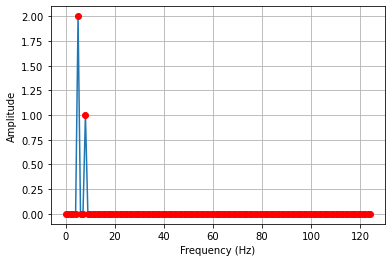

In [47]:
plt.plot(f_n[0:nf],amplitude[0:nf])
plt.plot(f_n[0:nf],amplitude[0:nf],'ro')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [48]:
print(xf[0:20])

[ 9.41469125e-14-0.00000000e+00j -3.41573810e-16+5.69097722e-14j
  4.12266505e-14+2.53086972e-14j -5.55649039e-14+7.62269302e-14j
 -6.50247094e-14-4.26970178e-14j  2.50000000e+02-4.24570679e-14j
  3.57035248e-14-5.37044455e-15j -2.22047280e-14+5.83031511e-14j
 -5.14079431e-14+1.25000000e+02j -2.26591562e-15-5.29681898e-14j
 -3.03593944e-14-1.62730566e-14j -1.90049873e-14-4.12725868e-14j
 -1.73553301e-14-5.92581397e-14j  7.30539109e-14-7.26338009e-14j
  2.87393550e-14+3.30954355e-14j  2.35775921e-14-4.51567434e-14j
  8.47011792e-14+2.45166387e-14j -1.49609960e-14+2.40323597e-14j
  4.31911975e-14-2.02583948e-14j  1.44810318e-14+1.81951964e-14j]


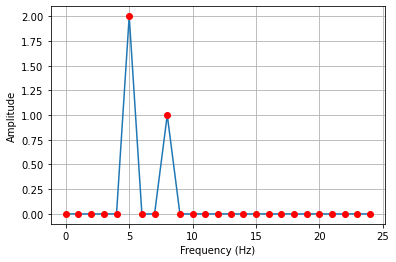

In [52]:
plt.plot(f_n[0:25],amplitude[0:25])
plt.plot(f_n[0:25],amplitude[0:25],'ro')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### THE SINGLE MOST IMPRESSIVE THING ABOUT THIS 

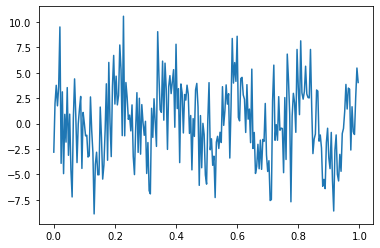

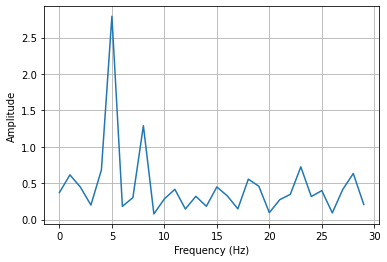

In [56]:
myseed = 1234
rng = np.random.default_rng(seed = myseed)
noise = rng.normal(0,3,nsamp) #random numbers with a mean of 0 
                              # and standard deviation as 2nd parameter
#print(noise)
signalwnoise = es[4]+ noise
plt.plot(t,signalwnoise) #t = np.arange(0,T,ts) #this is the time time vector with 1 value of time for each sample.
plt.show()
sn_fft = fft(signalwnoise)
amplitude = 2*np.abs(sn_fft)/nsamp


plt.plot(f_n[0:30],amplitude[0:30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

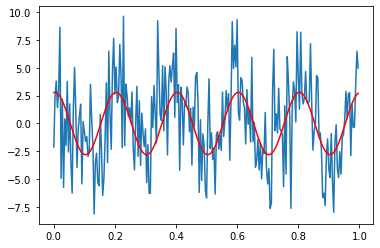

In [10]:
phase = np.angle(sn_fft)
phase = phase*180/np.pi
estimated5Hz = sinusoid(5,t,A=amplitude[5],theta = phase[5])
plt.plot(t,signalwnoise)
plt.plot(t,estimated5Hz,'r')
plt.show()

## Spectral Analysis 

#### In many disciplines, including neuroscience, spectral analysis is often the starting point in analyzing time seres data. 

#### Spectral analysis is the analysis of the frequency content of the signals being observed.

#### Its foundational in analyzing human EEG but also Local Field Potentials (LFP) obtained from inserting electrodes into animal models

#### Like any other measure of data, the quality of the estimate can be improved by averaging over multiple observations.   

dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'fs', 'spike_indices', 'spike_fs'])


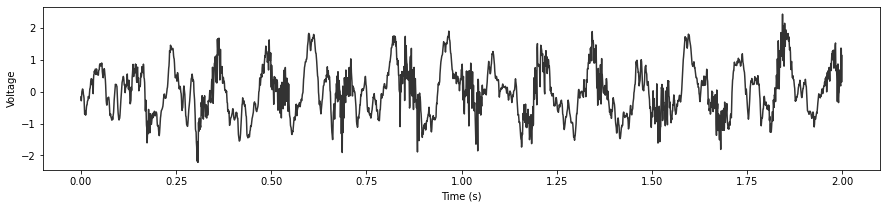

In [11]:
data = loadmat('data/LFP.mat', squeeze_me=True)
print(data.keys())

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps

lfp = data['lfp'][0,:]/1000 # this file contains two channels, we'll only work with the first one
lfp_short = lfp[:int(2*fs)] # make a variable that has only the first two seconds of the LFP
t_short = np.arange(0, len(lfp_short)*deltaT, deltaT) # create the corresponding time vector

plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

#### The plot above has the local field potential (LFP) recorded in the rat hippocampus. This dataset comes from an openly accessible neuroscience database. For more information on this particular dataset, see [here](https://crcns.org/data-sets/hc/hc-2/about-hc-2).

#### You will notice that the LFP signal has a very prominent rhythmic component, with peaks near, for example, 0.25, 0.37, and 0.5 seconds. Therefore, it has a **periodicity of about 0.125 seconds**, or a **frequency of 8Hz**. This is a very famous brain oscillation, called the theta oscillation which is central to memory functions.  There is also some faster oscillations observable in the plot.  

### Problem #2 

#### I want you to use the FFT algorithm to investigate the amplitudes of the frequency content of the signal, visualizing it, and averaging the amplitudes. 

#### (a) Use the FFT examples as a guide on how to compute and visualize the amplitude spectrum.  Compute the amplitude spectrum of the segment of the data plotted above (lfp_short).

#### (b) Visualize the amplitude on a linear and on a logarithmic scale. You can do this by take the log of the amplitude, but you can also do it by choosing a logarithmic scale when you call plot. 

#### (c) Make a loop to segment 10 consecutive epochs of duration T = 2s from the LFP file, and compute the amplitude of each epoch and plot them all on the same graph. 

#### (d) Extend your loop to compute the average amplitude spectrum of a set of m segments of duration 2s. Make a graph that shows the average amplitude spectrum of the first m = 20, m= 40, and m = 80 segments.  



dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'fs', 'spike_indices', 'spike_fs'])


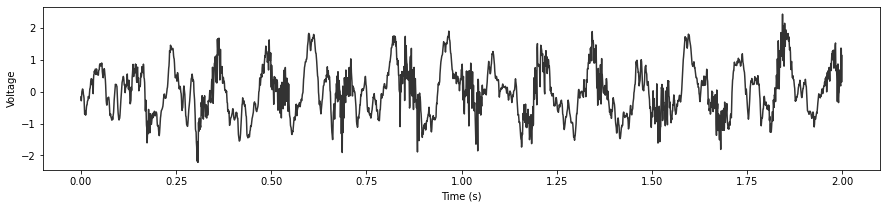

In [60]:
data = loadmat('data/LFP.mat', squeeze_me=True)
print(data.keys())

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length

lfp = data['lfp'][0,:]/1000 
lfp_short = lfp[range(0,nsamp)] # make a variable that has only the first T seconds of the LFP
t_short = np.arange(0, nsamp*deltaT, deltaT) # create the corresponding time vector
plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

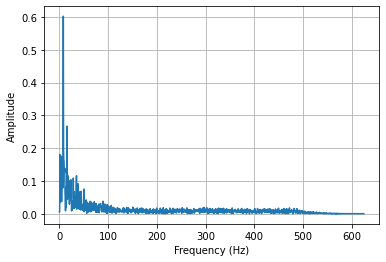

In [61]:
#part a
xf = fft(lfp_short) #take the fft 
amplitude = 2*np.abs(xf)/nsamp
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)/T
plt.plot(f_n,amplitude[0:nf])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


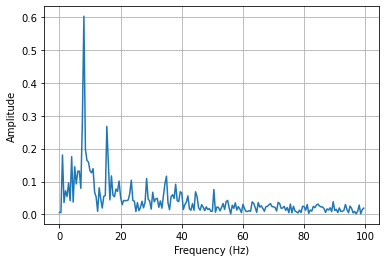

In [62]:
deltaF = 1/T  #frequency steps
maxf = 100  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I want to plot 
plt.plot(f_n[0:maxbin],amplitude[0:maxbin])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


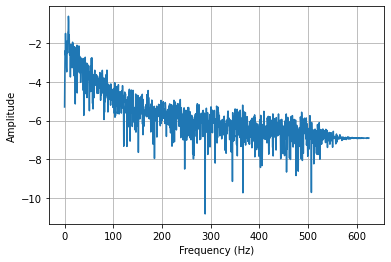

In [71]:
#b Visualize the amplitude on a linear and on a logarithmic scale. You can do this by take the log of the amplitude,
#  but you can also do it by choosing a logarithmic scale when you call plot. 
xf = fft(lfp_short) #take the fft 
amplitude = 2*np.abs(xf)/nsamp
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
f_n = np.arange(0,nf)/T
plt.plot(f_n,np.log(amplitude[0:nf]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

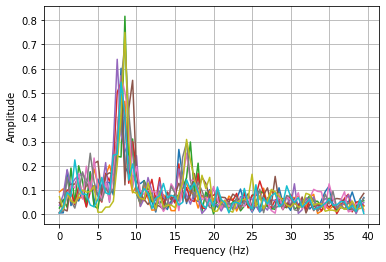

In [63]:
#c lets get 10 epochs, compute fft and plot 
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 
maxf = 40  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I want to plot 
for j in range(10): #the range is 10 because we are looking for 10 epochs
    lfp_short = lfp[range(j*nsamp,(j+1)*nsamp)]
    xf = fft(lfp_short)
    amplitude = 2*np.abs(xf)/nsamp #always divide by number of samples. 2 x for negative frequencies 
    plt.plot(f_n[0:maxbin],amplitude[0:maxbin]) 

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

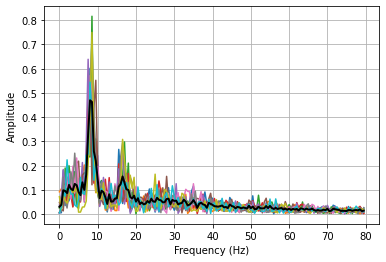

In [76]:
#d averaging them together. 
T = 2# segment length 
nsamp = T*fs # number of samples is the segment length
deltaF = 1/T  #frequency steps
nf = int(np.floor(nsamp/2)) #number of frequencies you can estimate is 1/2 the number of samples.
                            #I used floor just in case nsamp is odd. 
f_n = np.arange(0,nf)*deltaF # the frequencies resolved by the fft 
maxf = 80  #highest frequency I want to plot
maxbin = int(maxf/deltaF) #index to highest frequency I wasnt to plot 
nepochs = 10
amplitude = np.zeros((nepochs,nf)) #I made an empty array to hold the amplitude spectra of each frequency 
for j in range(nepochs):
    lfp_short = lfp[range(j*nsamp,(j+1)*nsamp)]
    xf = fft(lfp_short)
    amplitude[j,:] = 2*np.abs(xf[0:nf])/nsamp #always divide by number of samples. 2 x for negative frequencies 
    plt.plot(f_n[0:maxbin],amplitude[j,0:maxbin]) #plot the individual epoch spectra (YOU DONT NEED TO DO THIS FOR THE HWK)
amplitude_avg = np.mean(amplitude,axis = 0) #take the average over all epochs
plt.plot(f_n[0:maxbin],amplitude_avg[0:maxbin],'k',linewidth=2) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
